In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from itertools import combinations
from sklearn.preprocessing import LabelEncoder


In [ ]:
file_path='/content/drive/MyDrive/MACHINE LEARNING/DATASETS/Iris flower dataset.csv'

In [ ]:
df = pd.read_csv(file_path)


In [ ]:
print("First five rows of the dataset:")
print(df.head())

First five rows of the dataset:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Encode target labels into numerical values
le = LabelEncoder()
y_encoded = le.fit_transform(y)
target_names = le.classes_

# Get feature names from the dataframe columns
feature_names = df.columns[:-1].tolist()

In [ ]:
plot_colors = "ryb"
plot_step = 0.02
pairs = list(combinations(range(X.shape[1]), 2))

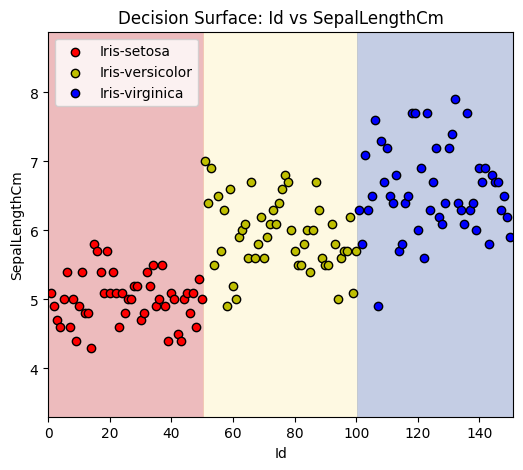

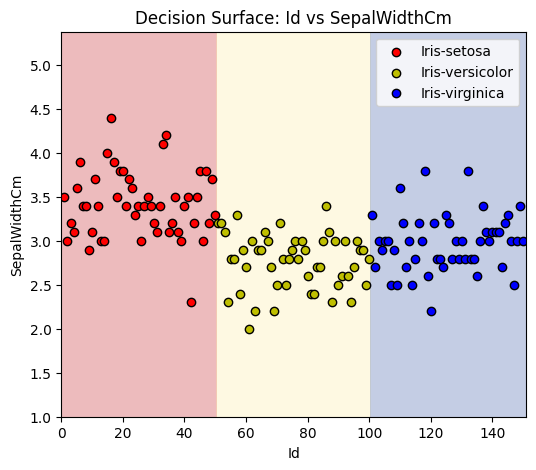

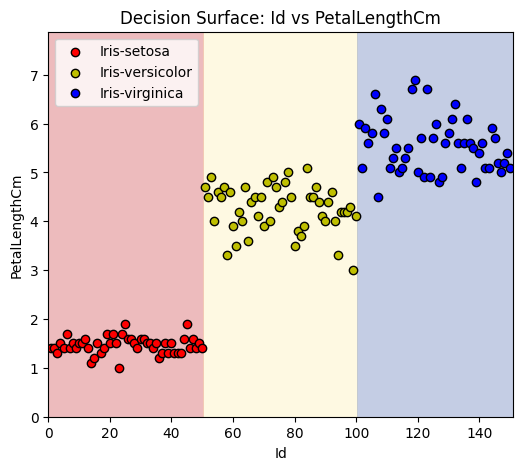

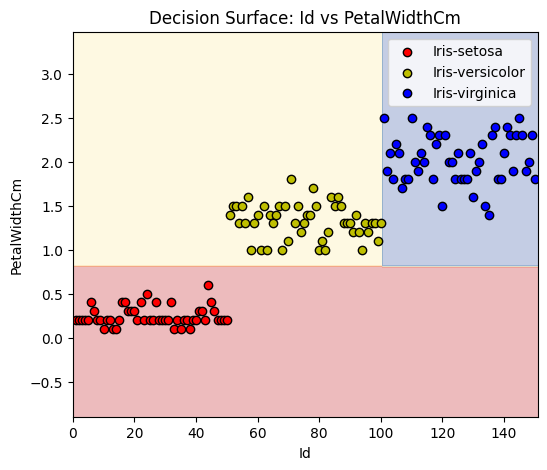

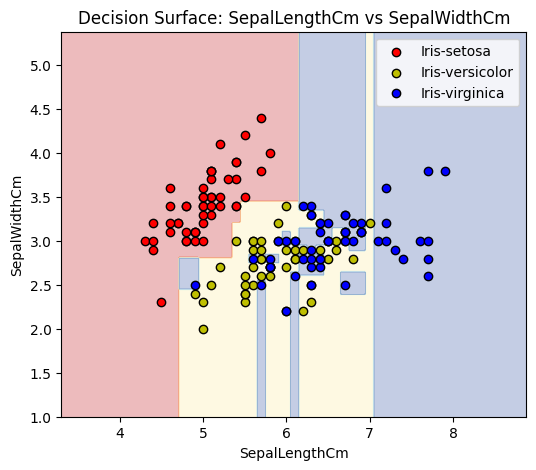

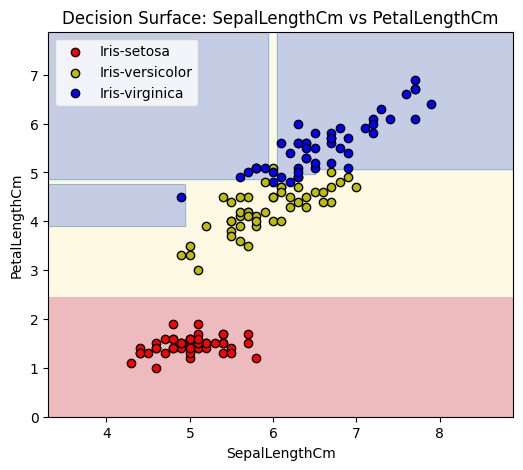

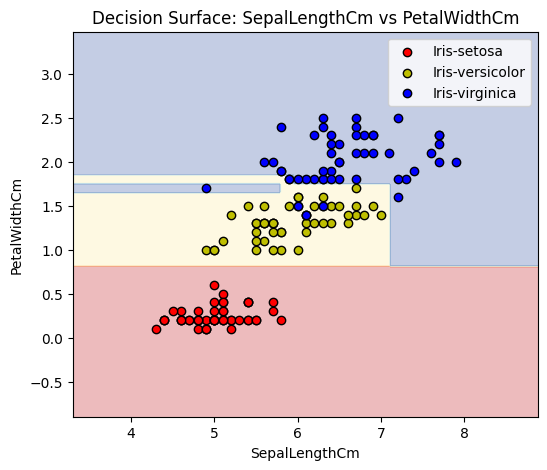

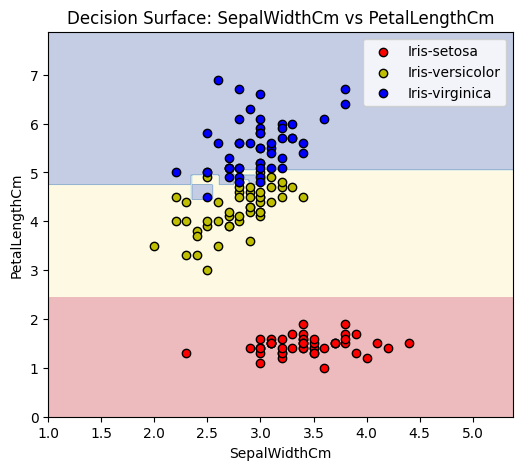

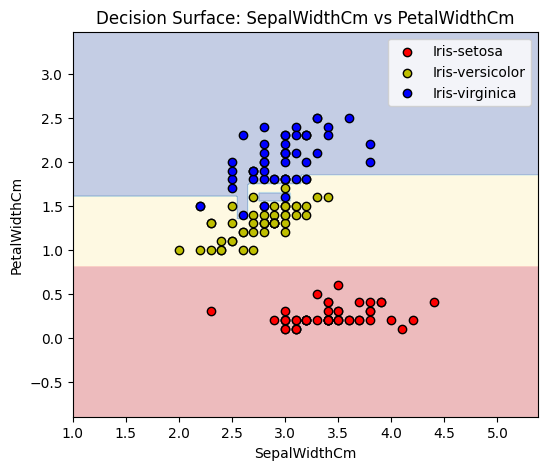

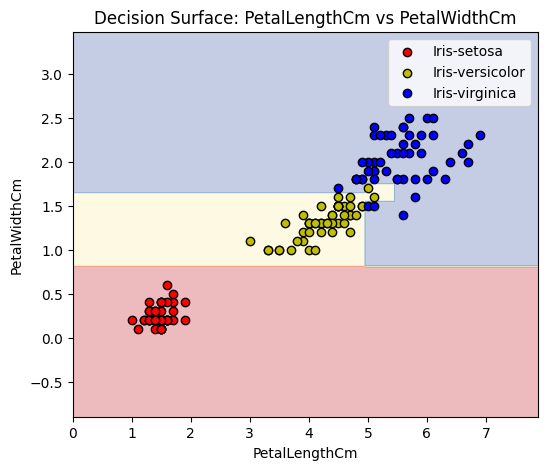

In [ ]:
for i, (x_idx, y_idx) in enumerate(pairs):
      X_pair = X[:, [x_idx, y_idx]]
      # Train the classifier using the numerically encoded target labels
      clf = DecisionTreeClassifier().fit(X_pair, y_encoded)
      x_min, x_max = X_pair[:, 0].min() - 1, X_pair[:, 0].max() + 1
      y_min, y_max = X_pair[:, 1].min() - 1, X_pair[:, 1].max() + 1
      xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),np.arange(y_min, y_max, plot_step))
      # Predict with the classifier, which will now return numerical labels
      Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
      Z = Z.reshape(xx.shape)
      plt.figure(figsize=(6, 5))
      plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
      for idx, color in zip(range(len(target_names)), plot_colors):
                # Use y_encoded for scatter plot indexing
                plt.scatter(X_pair[y_encoded == idx, 0], X_pair[y_encoded == idx, 1],
                                    c=color, label=target_names[idx], edgecolor='k')
      plt.xlabel(feature_names[x_idx])
      plt.ylabel(feature_names[y_idx])
      plt.title(f"Decision Surface: {feature_names[x_idx]} vs {feature_names[y_idx]}")
      plt.legend()
      plt.show()

In [ ]:
clf_all = DecisionTreeClassifier().fit(X, y)


In [ ]:
plt.figure(figsize=(15, 10))
plot_tree(clf_all, filled=True, feature_names=feature_names, class_names=target_names)
plt.title("Decision Tree using all features")
plt.show()

NameError: name 'feature_names' is not defined

<Figure size 1500x1000 with 0 Axes>